1. Инициализация случайных кластеров
2. В цикле: 
* находим центры кластеров
* найти кластеры для объектов

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
points = pd.read_csv('https://raw.githubusercontent.com/iad34/seminars/master/materials/coord.csv')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [3]:
points.head()

,LAT,LONG
0,49.987000,142.157883
1,49.964722,143.263031
2,49.822498,142.154556
3,49.770195,144.087326
4,49.668335,144.100281


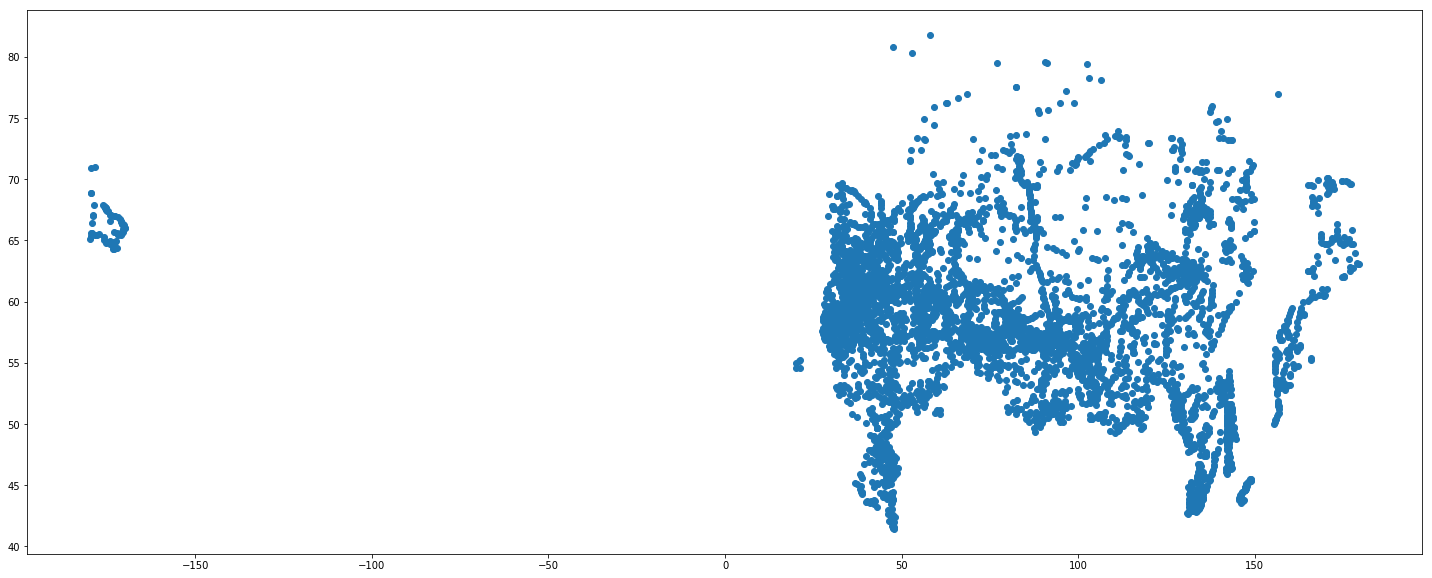

In [4]:
plt.figure(figsize=(25, 10))
plt.scatter(points['LONG'], points['LAT'])

In [5]:
from sklearn.metrics import pairwise_distances

In [6]:
class KMeans:
    def __init__(self, n_clusters, max_iter=100, show=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.show = show
        
    def fit_transform(self, X):
        n_samples = X.shape[0]
        n_features = X.shape[1]
        self.clusters = np.random.randint(0, self.n_clusters, size=n_samples)
        self.centers = np.zeros((self.n_clusters, n_features))
        
        if self.show:
                plt.figure(figsize=(25, 10))
                plt.scatter(X[:, 1], X[:, 0], c=self.clusters)
        
        for it in range(self.max_iter):
            for c in range(self.n_clusters):
                self.centers[c] = X[self.clusters == c].mean(axis=0)
            distances = pairwise_distances(X, self.centers)
            self.clusters = np.argmin(distances, axis=1)
            
            if self.show:
                plt.figure(figsize=(25, 10))
                plt.scatter(X[:, 1], X[:, 0], c=self.clusters)
                
            
        return self.clusters

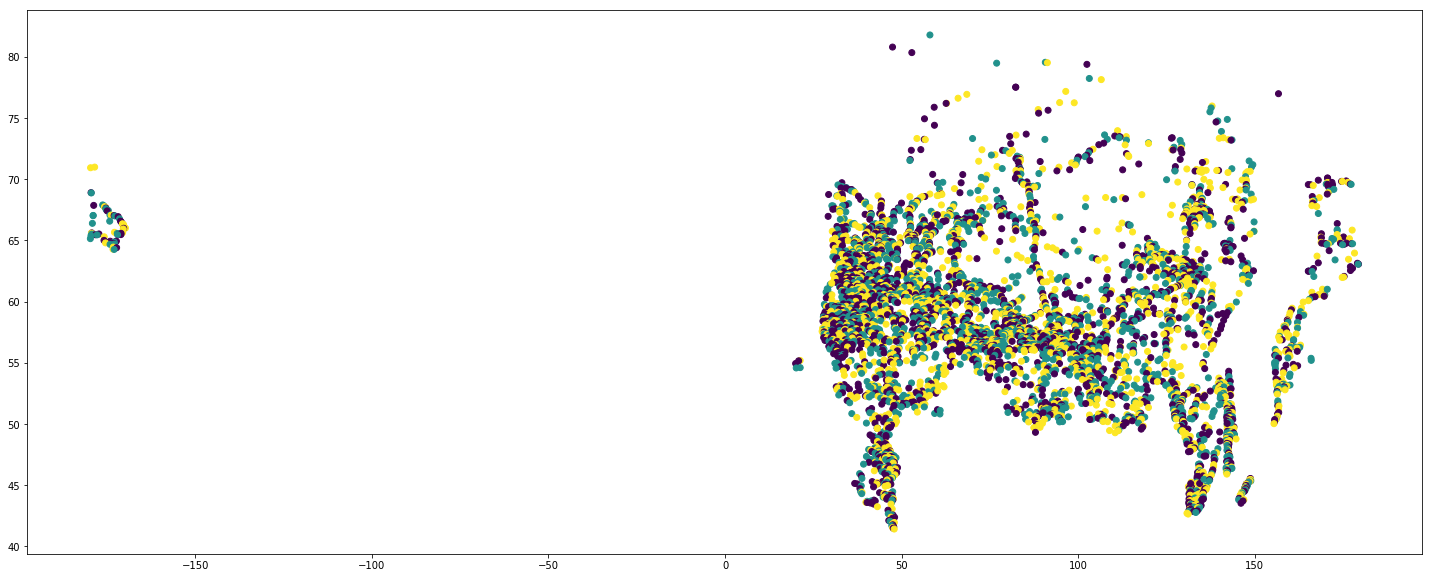

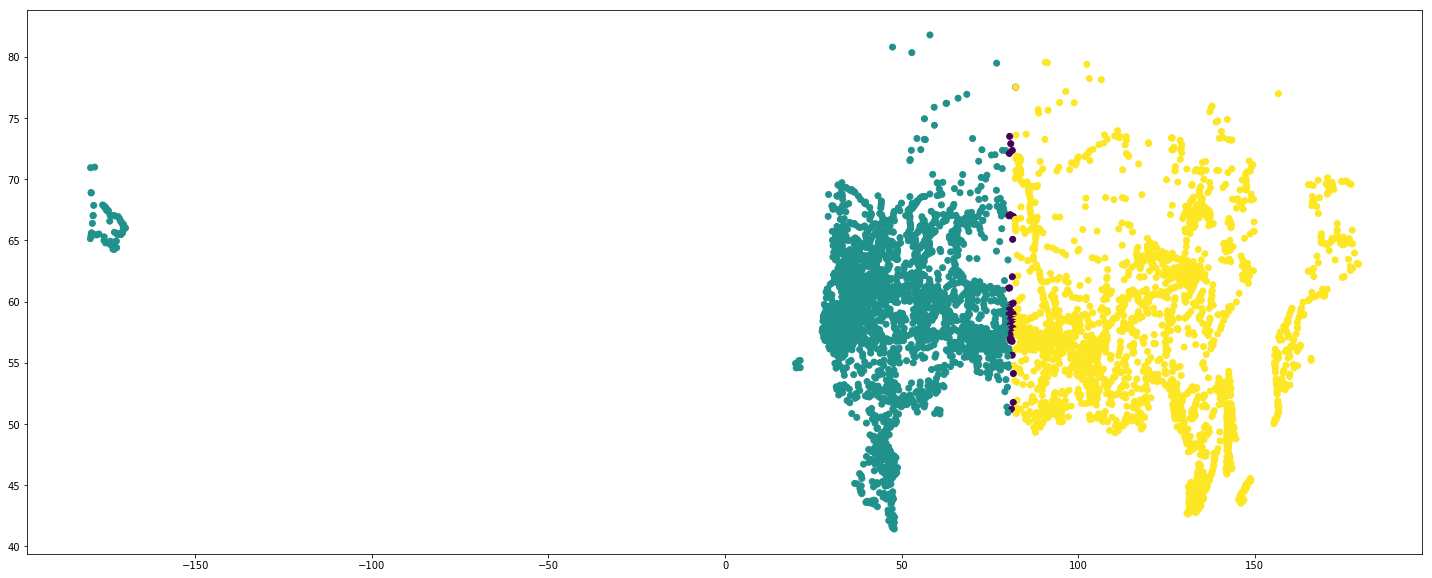

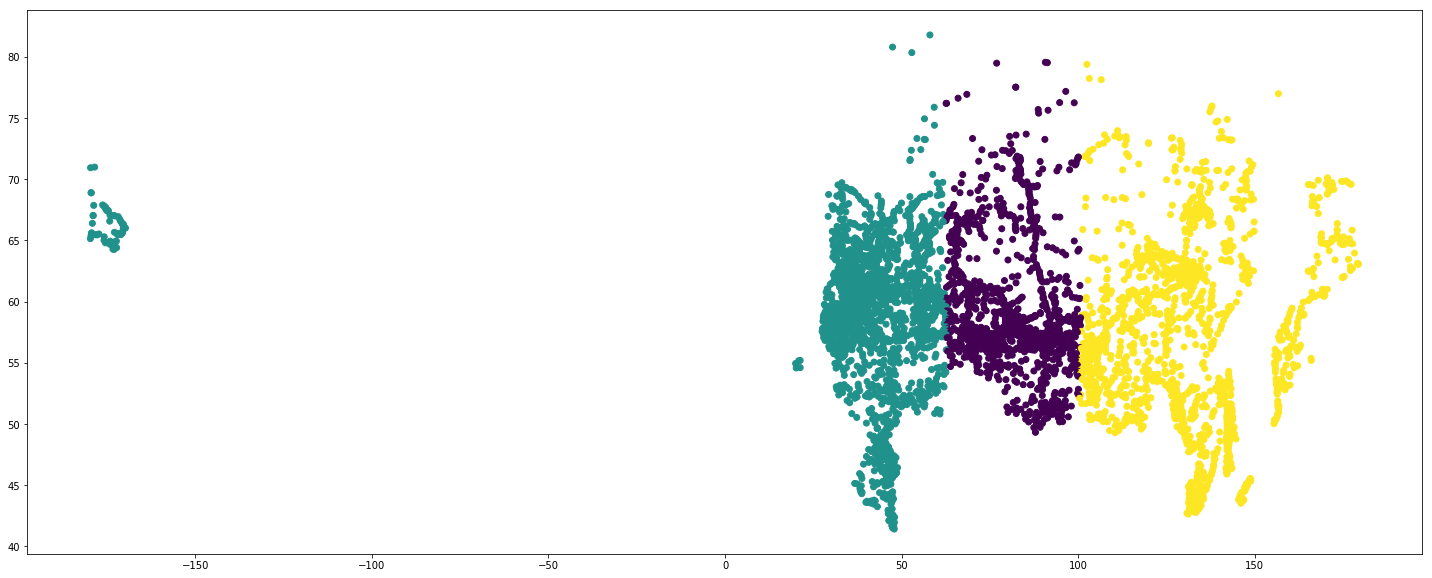

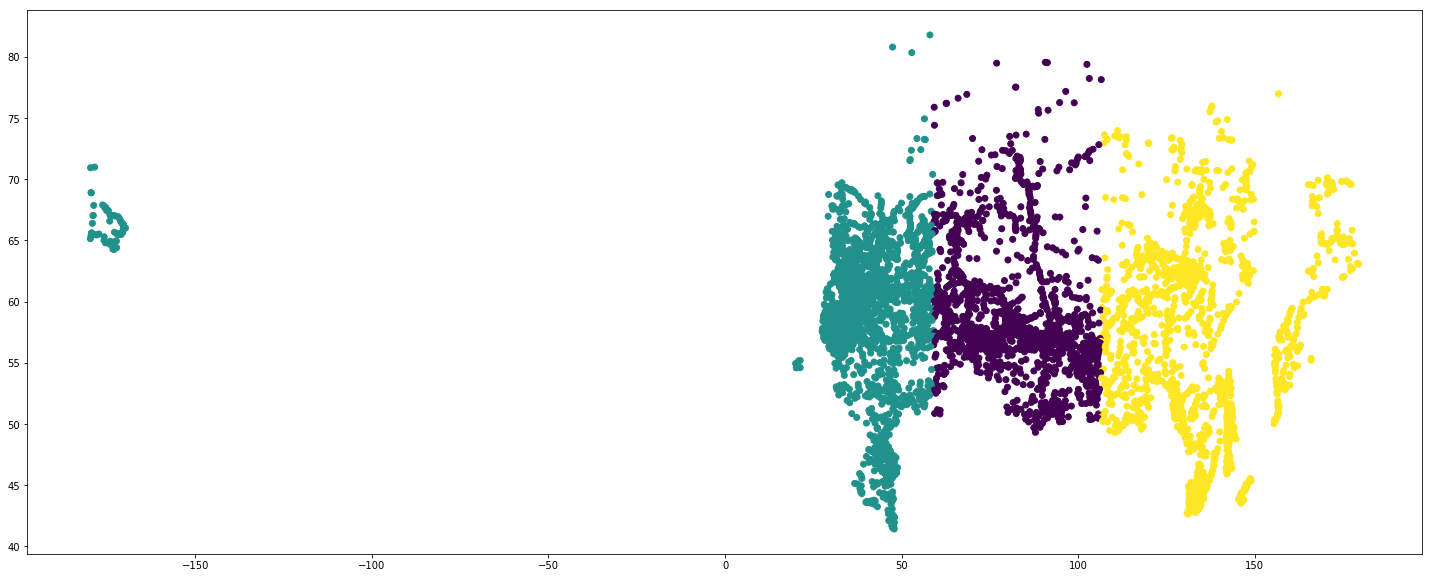

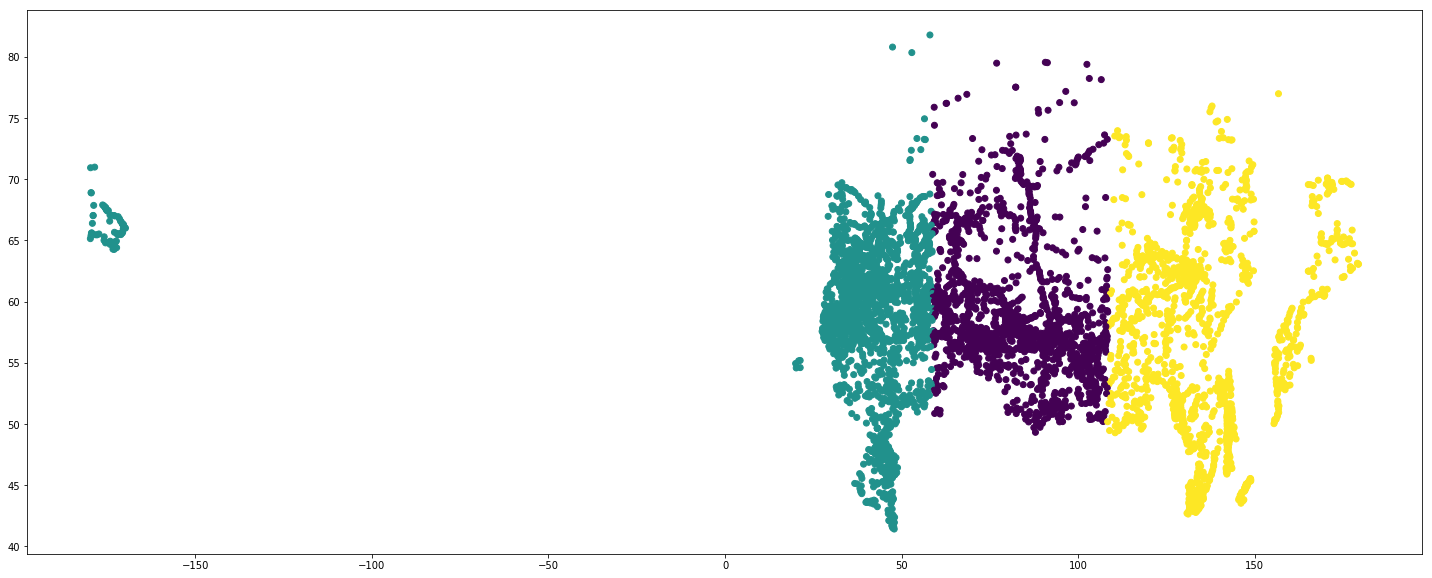

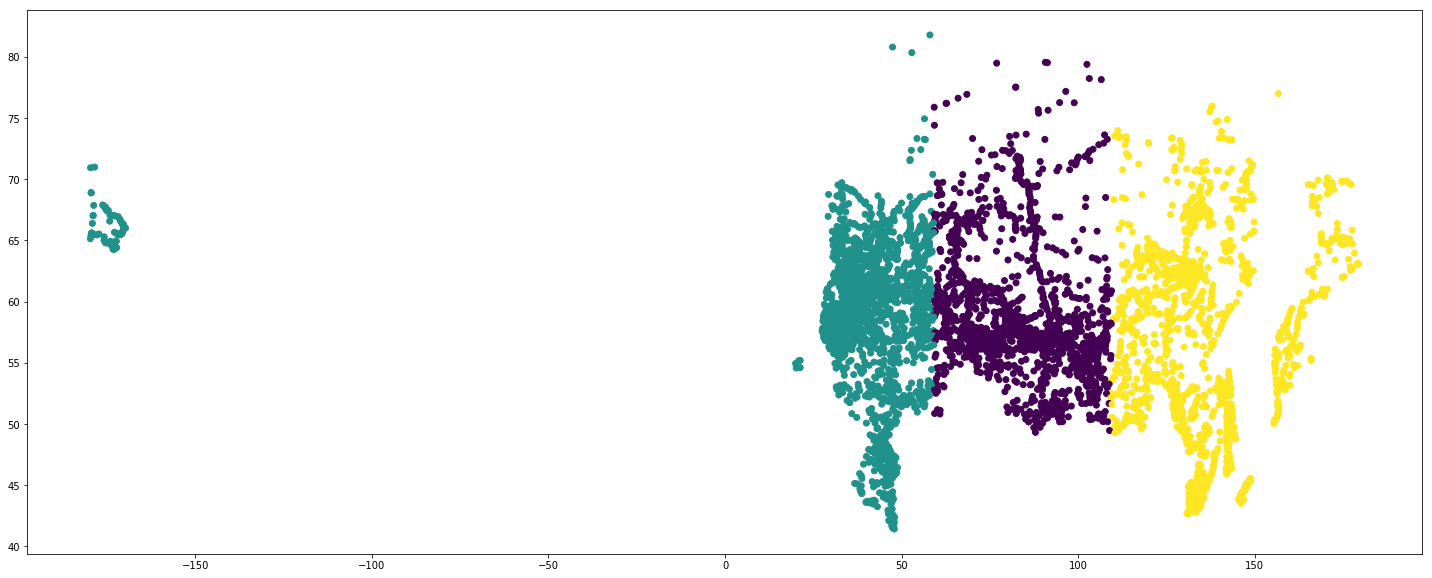

In [7]:
k_means = KMeans(3, max_iter=5, show=True)
clusters = k_means.fit_transform(points.values)

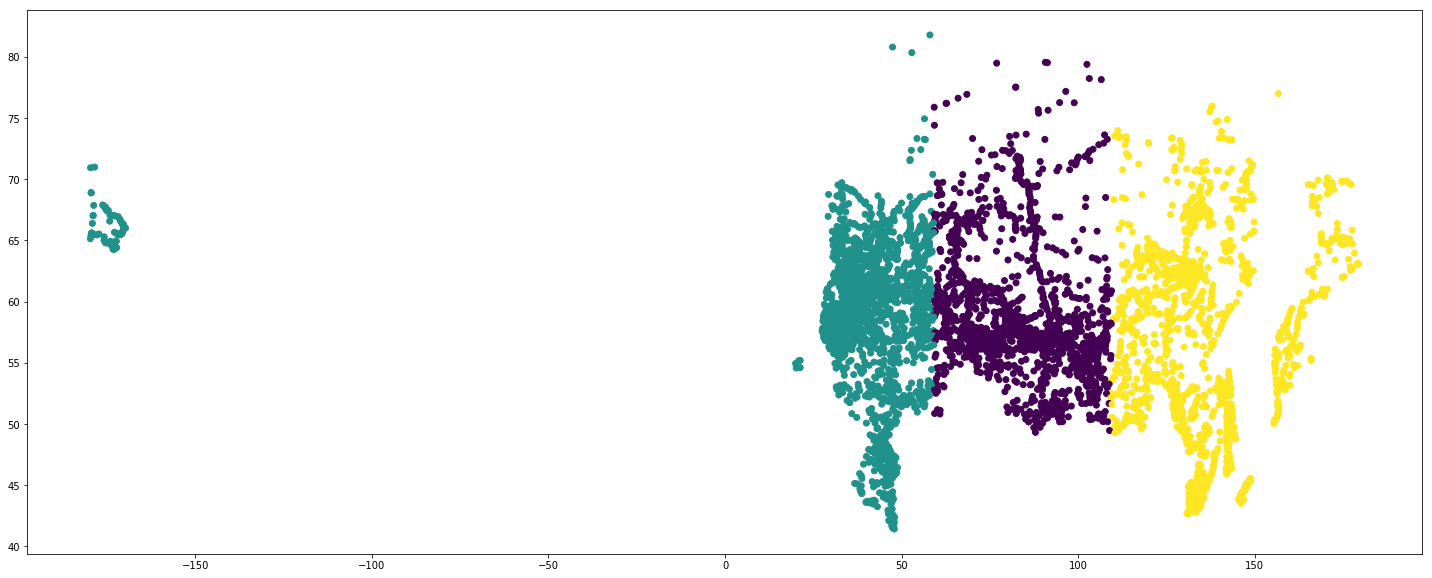

In [8]:
plt.figure(figsize=(25, 10))
plt.scatter(points['LONG'], points['LAT'], c=clusters)

In [9]:
img = plt.imread('https://raw.githubusercontent.com/iad34/seminars/master/materials/apple.png')

(237, 316, 3)

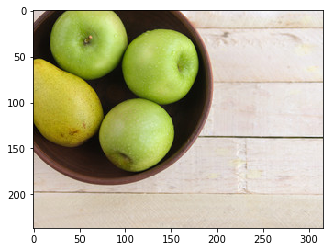

In [10]:
plt.imshow(img)
img.shape

In [11]:
two_dim_img = img.reshape(-1, 3)

In [12]:
k_means = KMeans(3)
clusters = k_means.fit_transform(two_dim_img)

In [13]:
clusters.shape, 237*316

((74892,), 74892)

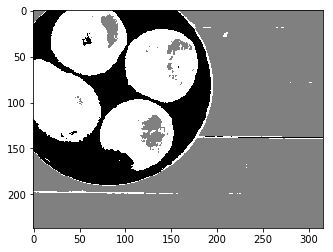

In [14]:
plt.imshow(clusters.reshape(237, 316), cmap='gray')

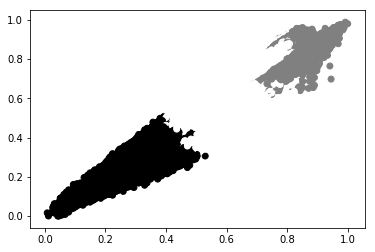

In [15]:
plt.scatter(two_dim_img[:, 0], two_dim_img[:, 1], c=clusters, cmap='gray') #учитывание расстояний можно сделать